<a href="https://colab.research.google.com/github/FaithNanzala/FINANCIAL-INCLUSION-ANALYSIS/blob/main/Moringa_School_IndependentProject_Week_2core_12_2021_Faith_Nanzala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINANCIAL INCLUSION ANALYSIS**

1.0 Defining the Question

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.


2.0 Importing our libraries

In [166]:
#Importing Pandas
import pandas as pd
#Importing numpy 
import numpy as np
#Importing matplotlib
import matplotlib.pyplot as plt
#Importing seaborn
import seaborn as sns

3.0 Loading our dataset


In [167]:
#loading our dataset
#dataset url = http://bit.ly/FinancialDataset
df = pd.read_csv('/content/Financial Dataset - 1.csv')
df


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


4.0 Data Understanding

In [168]:
#getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


The dataset has 23524 rows and 13 columns

In [169]:
#checking the columns
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [170]:
#Checking the number of records in our dataset
df.shape

(23524, 13)

The dataset has 23524 rows and 13 columns

In [171]:
#checking the first 10 rows of our dataset
df.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [172]:
#checking unique values
df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [173]:
#checking the last 10 rows of our dataset
df.tail(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [174]:
#checking the columns datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [175]:
#descriptive sumaries of the dataset
#The describe () function shows the descriptive summaries such as mean and standard deviation of the numerical columns
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [176]:
df.median()

year              2017.0
household_size       3.0
Respondent Age      35.0
dtype: float64

The median age in the population is 35.0 years, while the median year is 2017

In [177]:
df.mode()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Rwanda,2016.0,uniqueid_1,No,Rural,Yes,2.0,30.0,Female,Head of Household,Married/Living together,Primary education,Self employed
1,NaN,NaN,uniqueid_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,uniqueid_100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,uniqueid_1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,uniqueid_1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,NaN,NaN,uniqueid_995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,uniqueid_996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098,NaN,NaN,uniqueid_997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2099,NaN,NaN,uniqueid_998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our mode is NaN since our dataset has a lot of null values

Data Cleaning

Uniformity

In [178]:

#Action: changing the column titles to upper case for uniformity
df.columns = df.columns.str.rstrip().str.upper()
df.head()

,COUNTRY,YEAR,UNIQUEID,HAS A BANK ACCOUNT,TYPE OF LOCATION,CELL PHONE ACCESS,HOUSEHOLD_SIZE,RESPONDENT AGE,GENDER_OF_RESPONDENT,THE RELATHIP WITH HEAD,MARITAL_STATUS,LEVEL OF EDUCUATION,TYPE OF JOB
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [179]:
#renaming column names with the correct spelling
df.rename(columns = {"LEVEL OF EDUCUATION": "LEVEL OF EDUCATION", "THE RELATHIP WITH HEAD": "THE RELATIONSHIP WITH HEAD"}, inplace = True)
df.head()

,COUNTRY,YEAR,UNIQUEID,HAS A BANK ACCOUNT,TYPE OF LOCATION,CELL PHONE ACCESS,HOUSEHOLD_SIZE,RESPONDENT AGE,GENDER_OF_RESPONDENT,THE RELATIONSHIP WITH HEAD,MARITAL_STATUS,LEVEL OF EDUCATION,TYPE OF JOB
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


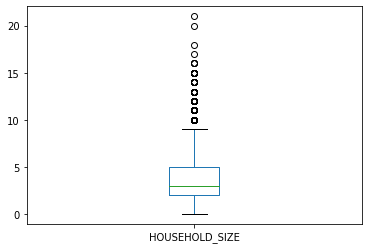

In [180]:
#checking for outliers on the variable HOUSEHOLD_SIZE using boxplot

# creating a boxplot
# Displaying our chart

df.boxplot(['HOUSEHOLD_SIZE'],grid = False)
plt.show()


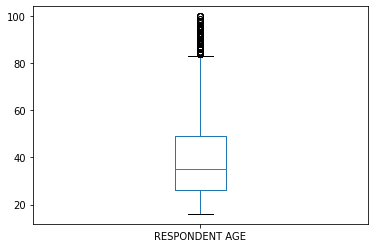

In [181]:
# checking for outliers on the variable RESPONDENT AGE using boxplot

# creating a boxplot
# Displaying our chart

df.boxplot(['RESPONDENT AGE'],grid = False)
plt.show()

In [182]:
#checking for anomalies
# the data description of the YEAR column  only included(2016,2017,2018)
anomalies = df.loc[df['YEAR'] > 2018].index
anomalies

# Removing the anomalies on the year column
df.drop(anomalies, inplace = True)

In [183]:
# checking that there are no anomalies in the YEAR column

df.YEAR.unique()

array([2018, 2016, 2017])

EXPLORATORY ANALYSIS

Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


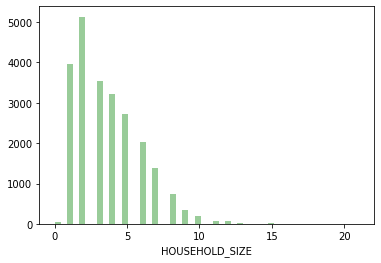

In [184]:
#plotting univariate summaries
sns.distplot(df['HOUSEHOLD_SIZE'], kde = False, color = 'green')

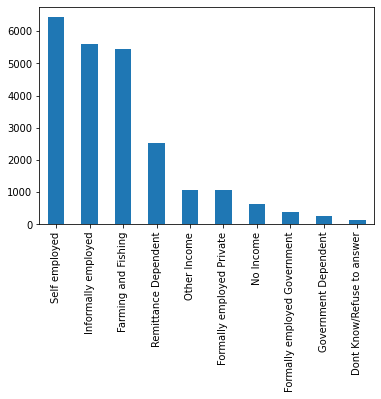

In [185]:
#CHECKING DISTRIBUTION  OF THE TYPE OF JOB
df['TYPE OF JOB'].value_counts().plot.bar()

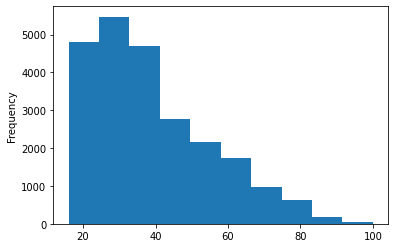

In [186]:
#Plotting Age
df[df['RESPONDENT AGE'] < 105]['RESPONDENT AGE'].plot.hist()

Ages 30-39 has the highest number of people



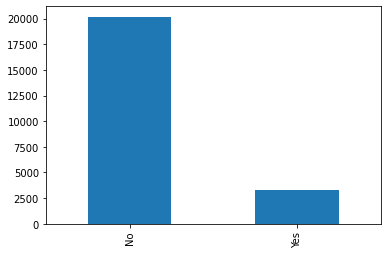

In [187]:
#checking for the number of people with a bank account
df['HAS A BANK ACCOUNT'].value_counts().plot.bar()

The people without bank accounts is more than those with bank accounts.




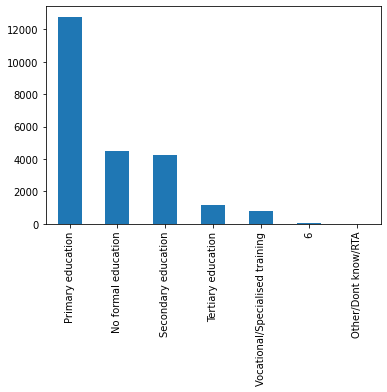

In [188]:
#distribution frequency for the level of education
df['LEVEL OF EDUCATION'].value_counts().plot.bar()

In [189]:
#  checking for skewness 
df.skew(axis = 0, skipna = True)

YEAR              0.045749
HOUSEHOLD_SIZE    0.977727
RESPONDENT AGE    0.841754
dtype: float64

Conclusion

From our analysis above, a lot of people do not have a bank accounts yet most people are employed with those self-employed being the highest. The number of self-employed people is the highest among the types of job. People with primary level of education are the highest in number. People aged between 30-39 has the highest population. We will proceed with bivariate analysis to understand the effects and influence these variables have on the level of financial inclusion.

Bivariate Analysis



Visualization

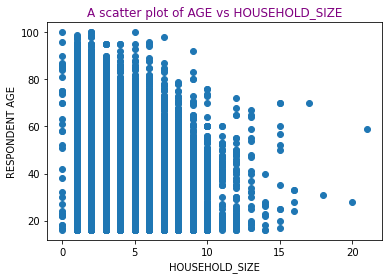

In [190]:
# Plotting our scatterplot to compare two numerical the variables

# plotting our scatterplot using matplotlib
plt.scatter(df['HOUSEHOLD_SIZE'], df['RESPONDENT AGE'])

# Giving the scatterplot a title
plt.title('A scatter plot of AGE vs HOUSEHOLD_SIZE', color = 'purple')
# Labelling the x axis
plt.xlabel('HOUSEHOLD_SIZE')
# Labelling the y axis
plt.ylabel('RESPONDENT AGE')
# We then display our scatterplot 
plt.show()

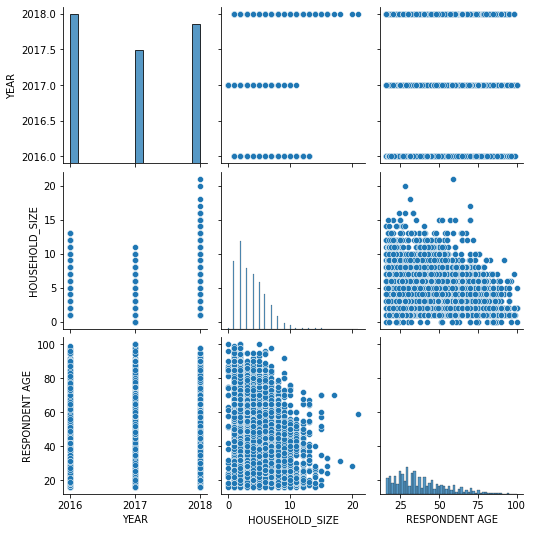

In [191]:
# Plotting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df)
plt.show()

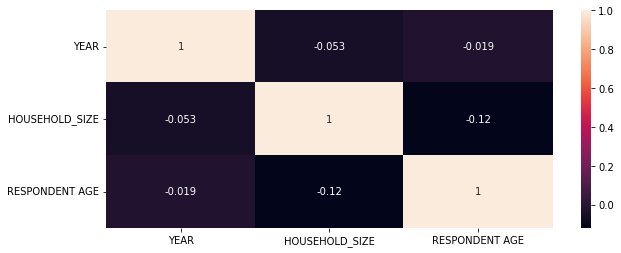

In [192]:
#Correlation
plt.figure(figsize=(10, 4))

df_corr = df.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

Evaluation

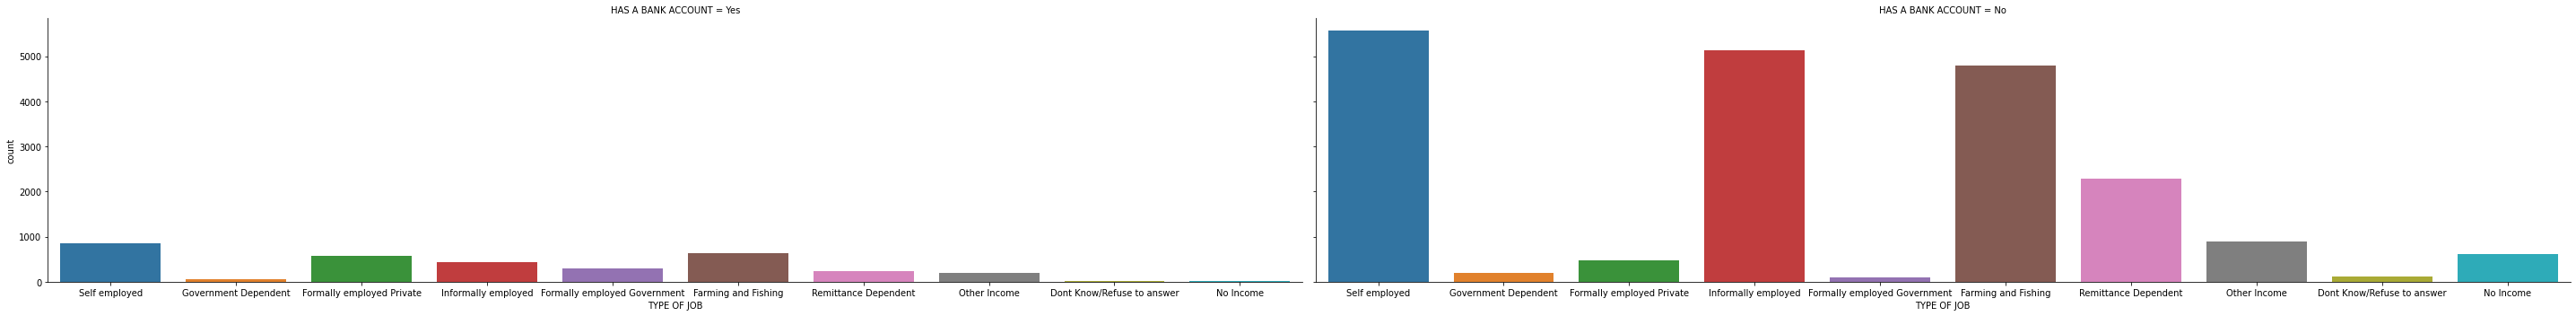

In [193]:
#Checking if the type of job determines having a bank account
sns.catplot(x = 'TYPE OF JOB', col = 'HAS A BANK ACCOUNT', data = df, kind = 'count', aspect = 4)

From our evaluation,  the number of people is lowest among the people who are formally employed by the government wheareas the number of people who do not have bank accounts is highest among the self-employed.The number of people who are self-employed is the highest among people who have bank accounts.  



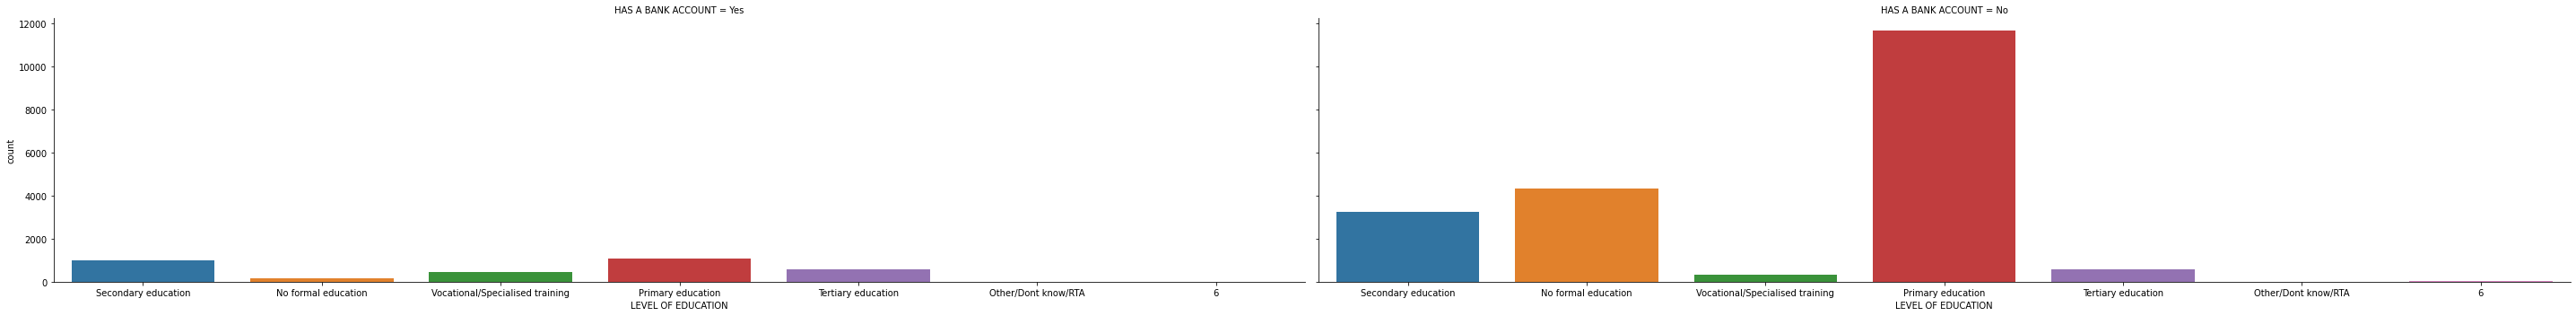

In [194]:
#Checking whether the level of education determines having a bank account
sns.catplot(x = 'LEVEL OF EDUCATION', col = 'HAS A BANK ACCOUNT', data = df, kind = 'count', aspect = 4)

From our evaluation, people with primary level of education are the highest number of people who do not have bank accounts also the highest number of people with bank accounts have the primary level of education.  In conclusion, education levels are not the best variables to explain why people do not have bank accounts.

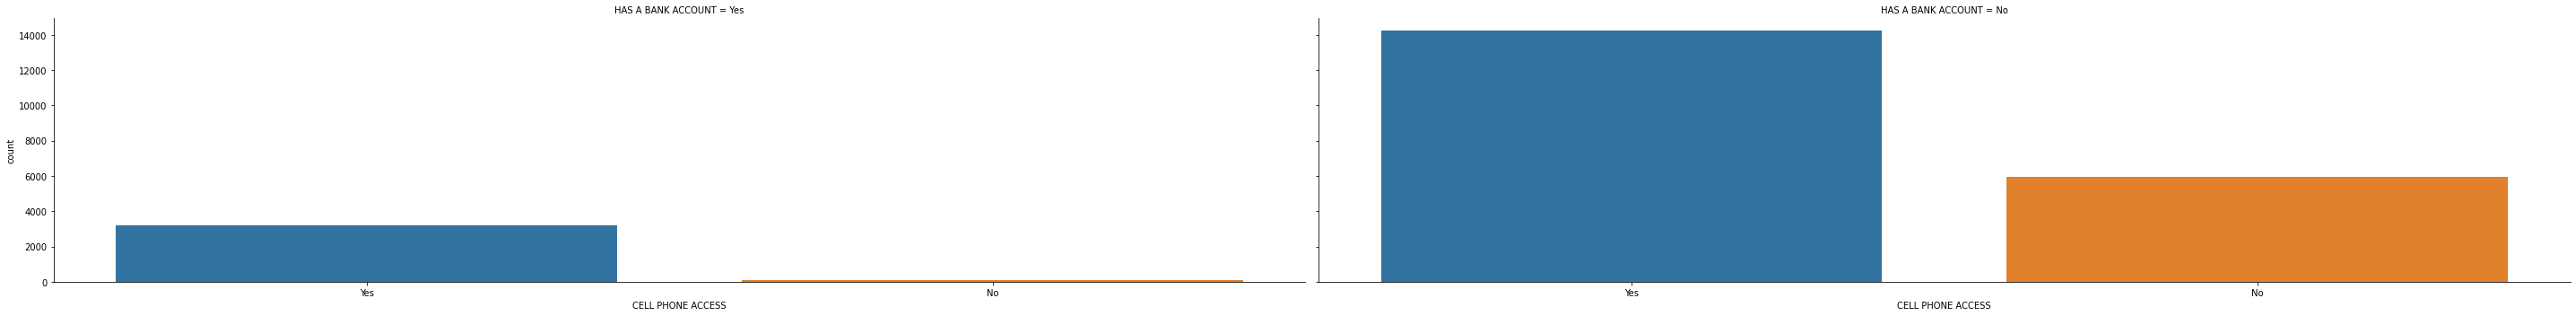

In [195]:
#Checking whether cell phone access determines having a bank account
sns.catplot(x = 'CELL PHONE ACCESS', col = 'HAS A BANK ACCOUNT', data = df, kind = 'count', aspect = 4)

Not all persons with phone access have bank accounts, however, a few of them who have access to cell phones have bank accounts.

Multivariate Analysis

PCA Analysis

In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['HOUSEHOLD_SIZE', 'RESPONDENT AGE']])
scaled_data = scaler.transform(df[['HOUSEHOLD_SIZE', 'RESPONDENT AGE']])

In [197]:
scaled_data = pd.DataFrame(scaled_data)


In [198]:
scaled_data = pd.DataFrame(scaled_data)
df2 = scaled_data.fillna(0)
df2.head()

,0,1
0,-0.299010,-0.896252
1,0.578193,1.888295
2,0.578193,-0.775184
3,0.578193,-0.290916
4,1.893997,-0.775184


In [199]:
from sklearn.decomposition import PCA
logmodel = PCA(n_components=2)
logmodel.fit(df2)
pca_x = logmodel.transform(df2)

In [200]:
pca_x


array([[ 0.42186211, -0.84540311],
       [-0.92545004,  1.74456489],
       [ 0.95690766, -0.13980553],
       ...,
       [ 0.9141268 , -0.09697893],
       [ 1.40639149,  0.65144526],
       [ 2.76511094,  1.15309583]])